<a href="https://colab.research.google.com/github/arunv8055/Agriwatch-Soya-report/blob/main/Oil_Seeds_Agriwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Essential Libraries for Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px
import plotly.io as pio

# Set the default renderer
pio.renderers.default = 'iframe'  # Use 'notebook' if you are in Jupyter or 'browser' for opening in a new tab
pio.renderers.default = 'notebook'


# Importing and Preparing Dataset

In [2]:
url = 'https://raw.githubusercontent.com/arunv8055/Agriwatch-Soya-report/refs/heads/main/Agmarknet_Price_And_Arrival_Report.csv'
df = pd.read_csv(url, encoding='ISO-8859-1', on_bad_lines='skip')
df.head()


,Reporting Date,Commodity,Type,Centre,State,Country,Low_Rs/Qtl,High_Rs/Qtl
0,18-10-2024,Soyabean,Plant,Indore,MadhyaÂ Pradesh,India,4550,4660
1,18-10-2024,Soyabean,Mandi,Indore,MadhyaÂ Pradesh,India,4350,4500
2,18-10-2024,Soyabean,Plant,Nagpur,Maharashtra,India,4575,4650
3,18-10-2024,Soyabean,Mandi,Nagpur,Maharashtra,India,4100,4450
4,18-10-2024,Soyabean,Mandi,Latur,Maharashtra,India,4350,4500


In [3]:
df['Reporting Date'] = pd.to_datetime(df['Reporting Date'], dayfirst=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Reporting Date  242 non-null    datetime64[ns]
 1   Commodity       242 non-null    object        
 2   Type            242 non-null    object        
 3   Centre          242 non-null    object        
 4   State           242 non-null    object        
 5   Country         242 non-null    object        
 6   Low_Rs/Qtl      242 non-null    object        
 7   High_Rs/Qtl     242 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 15.2+ KB


In [5]:
df.shape

(242, 8)

In [6]:
print(df.columns)


Index(['Reporting Date', 'Commodity', 'Type', 'Centre', 'State', 'Country',
       'Low_Rs/Qtl', 'High_Rs/Qtl'],
      dtype='object')


# General Analysis

In [7]:
#@title Today days and number of days collected in the dataset
days = df['Reporting Date'].unique()
print(f'Number of days in the dataset: {len(days)}')
print(f'there are {(days)}')

Number of days in the dataset: 10
there are <DatetimeArray>
['2024-10-18 00:00:00', '2024-10-19 00:00:00', '2024-10-21 00:00:00',
 '2024-10-22 00:00:00', '2024-10-23 00:00:00', '2024-10-24 00:00:00',
 '2024-10-25 00:00:00', '2024-10-26 00:00:00', '2024-10-28 00:00:00',
 '2024-11-04 00:00:00']
Length: 10, dtype: datetime64[ns]


In [8]:
# @title total Commodities and its list
# Strip extra whitespace and standardize names
df['Commodity'] = df['Commodity'].str.strip().replace({
    'Soybean\xa0': 'Soybean',
    'Soyabean': 'Soybean',
    'Groundnut\xa0': 'Groundnut',
    'Groundnut ': 'Groundnut',
    'Groundnut Seed': 'Groundnut',
    'Groundnut (Bold)': 'Groundnut',
    'Rapeseed/Mustard': 'Rapeseed Mustard'
})

# Verify unique commodities after standardization
total_commodities = df['Commodity'].unique()
print(f'Total Unique Commodities = {len(total_commodities)}')
print(f'Commodities = {total_commodities}')

Total Unique Commodities = 7
Commodities = ['Soybean' 'Rapeseed Mustard' 'Groundnut' 'GroundnutÂ' 'SoybeanÂ'
 'Groundnut(Bold)' 'GroundnutSeed']


In [9]:
# @title States Available
# Strip extra whitespace and standardize State names
df['State'] = df['State'].str.strip().replace({
    'Madhya\xa0Pradesh': 'Madhya Pradesh',
    'MadhyaÂ\xa0Pradesh': 'Madhya Pradesh',
    'Uttar\xa0Pradesh': 'Uttar Pradesh',
    'UttarÂ\xa0Pradesh': 'Uttar Pradesh'

})

# Verify unique states after standardization
unique_states = df['State'].unique()
print(f'Total Unique States = {len(unique_states)}')
print(f'States = {unique_states}')


Total Unique States = 8
States = ['Madhya Pradesh' 'Maharashtra' 'Rajasthan' 'Delhi' 'Uttar Pradesh'
 'Gujarat' 'MadhyaPradesh' 'UttarPradesh']


In [10]:
df.describe()

,Reporting Date
count,242
mean,2024-10-23 23:06:26.776859392
min,2024-10-18 00:00:00
25%,2024-10-21 00:00:00
50%,2024-10-23 00:00:00
75%,2024-10-26 00:00:00
max,2024-11-04 00:00:00


In [11]:
print(df.columns.tolist())


['Reporting Date', 'Commodity', 'Type', 'Centre', 'State', 'Country', 'Low_Rs/Qtl', 'High_Rs/Qtl']


In [12]:
df.columns

Index(['Reporting Date', 'Commodity', 'Type', 'Centre', 'State', 'Country',
       'Low_Rs/Qtl', 'High_Rs/Qtl'],
      dtype='object')

In [13]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [14]:
# Filter the DataFrame for Soybean prices where Type is 'Plant'
soybean_prices = df[(df['Commodity'].str.contains('Soybean', case=False)) & (df['Type'].str.contains('Plant', case=False))]

# Select relevant columns to display, using the correct column names
soybean_prices = soybean_prices[['Reporting Date', 'Commodity', 'Centre', 'Type', 'Low_Rs/Qtl', 'High_Rs/Qtl']]

# Display the table
soybean_prices


,Reporting Date,Commodity,Centre,Type,Low_Rs/Qtl,High_Rs/Qtl
0,2024-10-18,Soybean,Indore,Plant,4550,4660
2,2024-10-18,Soybean,Nagpur,Plant,4575,4650
6,2024-10-18,Soybean,Kota,Plant,4575,4625
8,2024-10-18,Soybean,Bundi,Plant,4600,4650
10,2024-10-18,Soybean,Baran,Plant,4550,4600
12,2024-10-18,Soybean,Bhawani/Jhalawar,Plant,4550,4600
25,2024-10-19,Soybean,Indore,Plant,4550,4660
27,2024-10-19,Soybean,Nagpur,Plant,4575,4650
31,2024-10-19,Soybean,Kota,Plant,4575,4625
33,2024-10-19,Soybean,Bundi,Plant,4600,4650


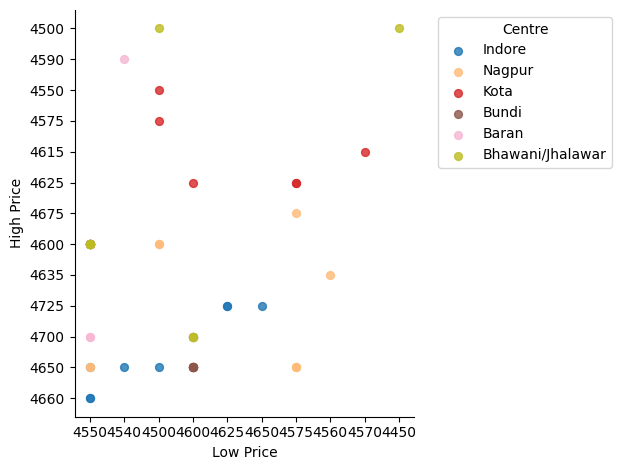

In [16]:
from matplotlib import pyplot as plt

# Create a color mapping for each center
unique_centers = soybean_prices['Centre'].unique()
color_map = {centre: plt.cm.tab20(i / len(unique_centers)) for i, centre in enumerate(unique_centers)}

# Plot each center with its assigned color
for centre, color in color_map.items():
    subset = soybean_prices[soybean_prices['Centre'] == centre]
    plt.scatter(subset['Low_Rs/Qtl'], subset['High_Rs/Qtl'], s=32, alpha=0.8, label=centre, color=color)

# Label the axes
plt.xlabel('Low Price')
plt.ylabel('High Price')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend(title='Centre', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()
plt.show()


In [17]:
# Filter the DataFrame for Soybean prices where Type is 'Plant'
soybean_prices = df[(df['Commodity'].str.contains('Soybean', case=False)) & (df['Type'].str.contains('Plant', case=False))]

# Select relevant columns
soybean_prices = soybean_prices[['Centre', 'Low_Rs/Qtl', 'High_Rs/Qtl']]

# Melt the DataFrame to have Low and High prices in a single column for easy plotting
soybean_prices_melted = soybean_prices.melt(id_vars='Centre', value_vars=['Low_Rs/Qtl', 'High_Rs/Qtl'],
                                            var_name='Price Type', value_name='Price')

# Plot using Plotly Express
fig = px.bar(soybean_prices_melted,
             x='Centre',
             y='Price',
             color='Price Type',
             barmode='group',
             title='Soybean Prices (Low and High) by Centre')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Centre",
    yaxis_title="Price (Rs/Qtl)",
    legend_title="Price Type",
    xaxis_tickangle=-45
)

# Show the plot
fig.show()


In [18]:
# Filter the DataFrame for Soybean prices where Type is 'Plant'
soybean_prices = df[(df['Commodity'].str.contains('Soybean', case=False)) & (df['Type'].str.contains('Plant', case=False))]

# Select relevant columns
soybean_prices = soybean_prices[['Reporting Date', 'Centre', 'Low_Rs/Qtl', 'High_Rs/Qtl']]

# Loop through each unique center and create a separate chart
for centre in soybean_prices['Centre'].unique():
    # Filter data for the specific centre
    centre_data = soybean_prices[soybean_prices['Centre'] == centre]

    # Melt the data to have Low and High prices in a single column for easy plotting
    centre_data_melted = centre_data.melt(id_vars='Reporting Date',
                                          value_vars=['Low_Rs/Qtl', 'High_Rs/Qtl'],
                                          var_name='Price Type', value_name='Price')

    # Plot using Plotly Express
    fig = px.line(centre_data_melted,
                  x='Reporting Date',
                  y='Price',
                  color='Price Type',
                  title=f'Soybean Prices (Low and High) Over Time - {centre}')

    # Customize the layout for better readability
    fig.update_layout(
        xaxis_title="Reporting Date",
        yaxis_title="Price (Rs/Qtl)",
        legend_title="Price Type"
    )

    # Show the plot for each center
    fig.show()
